<a href="https://colab.research.google.com/github/gagabriela2787/Grupo7ISPC/blob/SilviaCarinaMonzon/G7Nacidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análisis Nacidos Vivos Registrados 2018


# **RECOLECCIÓN Y PREPARACIÓN DE DATOS**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [11]:

# URL del archivo CSV
url = 'https://raw.githubusercontent.com/gagabriela2787/Grupo7ISPC/main/nacidos-vivos-registrados-2018_deis.csv'

# Leer el archivo CSV desde la URL
df = pd.read_csv(url)

# **ANÁLISIS EXPLORATORIO**


In [12]:
# Tamaño de la matriz de datos (filas, columnas)
df.shape

(30099, 15)

In [13]:
# Mostrar todas las columnas
print(df.columns)

Index(['jurisdiccion_de_residencia_id', 'jurisdiccion_de_residencia_nombre',
       'tipo_de_parto_id', 'tipo_de_parto_nombre', 'sexo', 'sexo_nombre',
       'edad_de_la_madre_grupos_id', 'edad_de_la_madre_grupos_nombre',
       'semanas_de_gestacion_id', 'semanas_de_gestacion_nombre',
       'instruccion_de_la_madre_id', 'instruccion_de_la_madre_nombre',
       'Intervalos_de_peso_al_nacer_id', 'intervalos_de_peso_al_nacer_nombre',
       'cantidad_nacimientos'],
      dtype='object')


In [14]:
#Primera descripción general de los datos
df.describe()

,jurisdiccion_de_residencia_id,tipo_de_parto_id,sexo,edad_de_la_madre_grupos_id,semanas_de_gestacion_id,instruccion_de_la_madre_id,Intervalos_de_peso_al_nacer_id,cantidad_nacimientos
count,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000
mean,42.405528,1.226120,1.663610,4.524968,5.487093,4.772351,5.763015,22.771321
std,30.808996,0.739671,1.204007,1.831169,1.155895,1.844638,1.850774,122.235335
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,14.000000,1.000000,1.000000,3.000000,5.000000,3.000000,5.000000,1.000000
50%,38.000000,1.000000,2.000000,4.000000,6.000000,5.000000,6.000000,2.000000
75%,70.000000,1.000000,2.000000,6.000000,6.000000,6.000000,7.000000,7.000000
max,99.000000,9.000000,9.000000,9.000000,8.000000,8.000000,9.000000,4512.000000


# **PROCESAMIENTO Y ANÁLISIS DE DATOS**


In [15]:
# Consulta: Obtener los nombres únicos de las provincias en el DataFrame
provincias = df['jurisdiccion_de_residencia_nombre'].unique()

In [16]:
#mostrar al usuario el nombre de las provincias del dataFrame, para que seleccione una y obtenga la informacion que
#requiere de dicha provincia
print("Solicitar datos de una provincia")

# Consulta: Obtener los nombres únicos de las provincias en el DataFrame
provincias = df['jurisdiccion_de_residencia_nombre'].unique()

# Mostrar los nombres únicos de las provincias
print("Nombres de las provincias presentes en el dataset:")
for pro in provincias:
    print(pro)

# Solicitar al usuario el ingreso de un provincia
provincia_ingresada = input("Ingrese el nombre de una provincia tal cual el listado anterior: ")

# Verificar si la provincia existe en el DataFrame
if provincia_ingresada in df['jurisdiccion_de_residencia_nombre'].unique():
    #creo el dataFrame con los registros de la provincia correspondiente
    registros = df[df['jurisdiccion_de_residencia_nombre'] == provincia_ingresada]
    # Solicitar al usuario el ingreso de una opcion
    print("Menu:")
    print("1- Cantidad de nacimientos")
    print("2-Cantidad de nacimientos simples")
    print("3-Cantidad de nacimientos dobles")
    opcion_ingresada = input("Ingrese una opcion del menu: ")
    opcion=int (opcion_ingresada)
    match opcion:
        case 1:
             print("Cantidad de nacimientos")
             suma_nacimientos=registros['cantidad_nacimientos'].sum()
             print("La cantidad de nacimientos en "+provincia_ingresada+" es: "+str(suma_nacimientos))

        case 2:
            print("Cantidad de nacimientos simples")
            # Inicializamos la variable 'sumaSimple' en 0
            sumaSimple = 0
            # Iteramos sobre las filas del DataFrame
            for index, row in registros.iterrows():
              if row['tipo_de_parto_id'] == 1:
                sumaSimple+= row['cantidad_nacimientos']
            print("La cantidad de nacimientos SIMPLES en "+provincia_ingresada+" es: "+str(sumaSimple))
        case 3:
            print("Cantidad de nacimientos dobles")
            # Inicializamos la variable 'sumaDobles' en 0
            sumaDobles = 0
            # Iteramos sobre las filas del DataFrame
            for index, row in registros.iterrows():
              if row['tipo_de_parto_id'] == 23:
                sumaDobles+= row['cantidad_nacimientos']
            print("La cantidad de nacimientos DOBLES en "+provincia_ingresada+" es: "+str(sumaDobles))
        case _:print("Error: La opcion ingresada no es correcta")


else:
      print("La provincia ingresada no se encuentra en el dataset.")

Solicitar datos de una provincia
Nombres de las provincias presentes en el dataset:
Formosa
Ciudad Aut. de Buenos Aires
Buenos Aires
Santa Fe
San Luis
Lugar no especificado
Salta
Neuquén
Río Negro
Misiones
Tucumán
Santa Cruz
Catamarca
Santiago del Estero
Chaco
La Rioja
La Pampa
Jujuy
Entre Ríos
Mendoza
Chubut
Corrientes
Córdoba
San Juan
Tierra del Fuego
Otro país


La provincia ingresada no se encuentra en el dataset.


In [17]:
# Ejecutar éste codigo para crear un dataframe con letra y nombre de cada provincia
Letra=["B","C","K","H","U","X","W","E","P","Y","L","F","M","N","Q","R","A","J","D","Z","S","G","V","T"]
Nombre=["Buenos Aires","Ciudad Aut. de Buenos Aires","Catamarca","Chaco","Chubut",
        "Córdoba","Corrientes","Entre Ríos","Formosa","Jujuy",
        "La Pampa","La Rioja","Mendoza","Misiones","Neuquén",
        "Río Negro","Salta","San Juan","San Luis","Santa Cruz",
        "Santa Fe","Santiago del Estero","Tierra del Fuego","Tucumán"]
df_Letra=pd.DataFrame(
    {"Letra": Letra,
     "Nombre": Nombre})
print(df_Letra)

   Letra                       Nombre
0      B                 Buenos Aires
1      C  Ciudad Aut. de Buenos Aires
2      K                    Catamarca
3      H                        Chaco
4      U                       Chubut
5      X                      Córdoba
6      W                   Corrientes
7      E                   Entre Ríos
8      P                      Formosa
9      Y                        Jujuy
10     L                     La Pampa
11     F                     La Rioja
12     M                      Mendoza
13     N                     Misiones
14     Q                      Neuquén
15     R                    Río Negro
16     A                        Salta
17     J                     San Juan
18     D                     San Luis
19     Z                   Santa Cruz
20     S                     Santa Fe
21     G          Santiago del Estero
22     V             Tierra del Fuego
23     T                      Tucumán


In [18]:
# Unir dataframe df_letra con el df original con datos
df_Union = pd.merge(left=df_Letra, right=df, how="inner", left_on="Nombre", right_on="jurisdiccion_de_residencia_nombre")
df_Union.head()

,Letra,Nombre,jurisdiccion_de_residencia_id,jurisdiccion_de_residencia_nombre,tipo_de_parto_id,tipo_de_parto_nombre,sexo,sexo_nombre,edad_de_la_madre_grupos_id,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_id,semanas_de_gestacion_nombre,instruccion_de_la_madre_id,instruccion_de_la_madre_nombre,Intervalos_de_peso_al_nacer_id,intervalos_de_peso_al_nacer_nombre,cantidad_nacimientos
0,B,Buenos Aires,6,Buenos Aires,1,Simple,1,Varón,5,30 a 34,8,Sin especificar,7,Terciaria/Universitaria Comple,4,1500 a 1999,1
1,B,Buenos Aires,6,Buenos Aires,2,Múltiple,1,Varón,2,15 a 19,5,32 a 36,5,Secundaria/Polimodal Completa,3,1000 a 1499,1
2,B,Buenos Aires,6,Buenos Aires,2,Múltiple,2,Mujer,5,30 a 34,6,37 a 41,3,Primaria/C. EGB Completa,7,3000 a 3499,3
3,B,Buenos Aires,6,Buenos Aires,1,Simple,9,Sin espeficar,4,25 a 29,5,32 a 36,3,Primaria/C. EGB Completa,7,3000 a 3499,2
4,B,Buenos Aires,6,Buenos Aires,2,Múltiple,2,Mujer,8,De 45 y más,3,24 a 27,8,Sin especificar,4,1500 a 1999,1


In [19]:
# Explorar la edades de las madres en relación a las semanas de gestación
edadMamaSemanasBebe = df[["edad_de_la_madre_grupos_nombre", "semanas_de_gestacion_nombre"]] #Lo guardamos en una variable
edadMamaSemanasBebe # mostramos el resultado

,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_nombre
0,25 a 29,32 a 36
1,40 a 44,37 a 41
2,30 a 34,Sin especificar
3,35 a 39,37 a 41
4,35 a 39,32 a 36
...,...,...
30094,Sin especificar,37 a 41
30095,25 a 29,28 a 31
30096,40 a 44,37 a 41
30097,25 a 29,Sin especificar


In [20]:
#Filtramos para visualizar solo las filas que pertenezcan al rango etario de "25 a 29"
edadMamaSemanasBebe[edadMamaSemanasBebe["edad_de_la_madre_grupos_nombre"].str.contains("25 a 29")] #muestra las filas coincidentes

,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_nombre
0,25 a 29,32 a 36
12,25 a 29,32 a 36
18,25 a 29,37 a 41
19,25 a 29,32 a 36
20,25 a 29,37 a 41
...,...,...
30087,25 a 29,37 a 41
30093,25 a 29,37 a 41
30095,25 a 29,28 a 31
30097,25 a 29,Sin especificar


In [21]:
#Agrupamos los datos por los rangos etarios
tablaAgrupada1 = edadMamaSemanasBebe.groupby("edad_de_la_madre_grupos_nombre").count()
tablaAgrupada1 #mostramos la tabla agrupada obtenida

,semanas_de_gestacion_nombre
edad_de_la_madre_grupos_nombre,
15 a 19,3826
20 a 24,5360
25 a 29,5536
30 a 34,5426
35 a 39,4822
40 a 44,2915
De 45 y más,800
Menor de 15,659
Sin especificar,755


In [22]:
# Explorar la distribución de nacimientos en 2018 por provincias discriminado por sexo

# Seleccionar los nacimientos de Varón por provincia
varon_count = df_Union[df_Union['sexo_nombre'] == 'Varón'].groupby('Letra')['cantidad_nacimientos'].sum()
print(varon_count)

# Seleccionar los nacimientos de Mujer por provincia
mujer_count = df_Union[df_Union['sexo_nombre'] == 'Mujer'].groupby('Letra')['cantidad_nacimientos'].sum()
print(mujer_count)

Letra
A     12819
B    126505
C     18362
D      3524
E     10857
F      2909
G      9309
H     12586
J      6902
K      3384
L      2450
M     15306
N     12592
P      6077
Q      5157
R      5510
S     26249
T     14279
U      4331
V      1398
W     10100
X     27554
Y      5955
Z      2629
Name: cantidad_nacimientos, dtype: int64
Letra
A     12384
B    118782
C     17096
D      3526
E     10424
F      2754
G      8759
H     12196
J      6596
K      3312
L      2323
M     14779
N     12265
P      5732
Q      4965
R      5161
S     25161
T     13636
U      4208
V      1290
W      9748
X     26015
Y      5852
Z      2482
Name: cantidad_nacimientos, dtype: int64


In [23]:
# Ejecutar éste Codigo para crear un Array con Tipo de Nacimiento y Descripción
Tipo = ["1", "2", "3"]
Descripcion = ["Prematuros", "A término", "Sin especificar"]
Total_M = [0,0,0]
Total_V = [0,0,0]
Total = [0,0,0]



*   **Nacimientos Prematuros**: Hasta menos de 37 semana de gestación inclusive.
*   **Nacimientos a Término**: Después de semana 38 inclusive.

Los códigos de semanas_de_gestacion_id son: **. 1** 'Menos de 22' **. 2** '22 a 23' **. 3** '24 a 27' **. 4** '28 a 31' **. 5** '32 a 36' **. 6** '37 a 41' **. 7** '42 y más' **. 8** 'Sin especificar'

In [24]:
# Agrupar según semanas_de_gestacion_id y sumar los nacimientos correspondientes a "prematuro", "a término" y "sin especificar" por sexo:
# MUJER
# Sumar total de nacimientos PREMATUROS MUJER
Total_M[0] = df_Union[(df_Union['semanas_de_gestacion_id'] <= 5) & (df_Union['sexo_nombre'] == 'Mujer')]['cantidad_nacimientos'].sum()
# Sumar total de nacimientos A TERMINO MUJER
Total_M[1] = df_Union[(df_Union['semanas_de_gestacion_id'] >= 6)  &  (df_Union["semanas_de_gestacion_id"]<= 7) & (df_Union['sexo_nombre'] == 'Mujer')]['cantidad_nacimientos'].sum()
# Sumar total de nacimientos SIN ESPECIFICAR MUJER
Total_M[2] = df_Union[(df_Union['semanas_de_gestacion_id'] == 8) & (df_Union['sexo_nombre'] == 'Mujer')]['cantidad_nacimientos'].sum()

# VARON
# Sumar total de nacimientos PREMATUROS VARÓN
Total_V[0] = df_Union[(df_Union['semanas_de_gestacion_id'] <= 5) & (df_Union['sexo_nombre'] == 'Varón')]['cantidad_nacimientos'].sum()
# Sumar total de nacimientos A TERMINO VARÓN
Total_V[1] = df_Union[(df_Union['semanas_de_gestacion_id'] >= 6)  &  (df_Union["semanas_de_gestacion_id"]<= 7) & (df_Union['sexo_nombre'] == 'Varón')]['cantidad_nacimientos'].sum()
# Sumar total de nacimientos SIN ESPECIFICAR VARÓN
Total_V[2] = df_Union[(df_Union['semanas_de_gestacion_id'] == 8) & (df_Union['sexo_nombre'] == 'Varón')]['cantidad_nacimientos'].sum()

# TOTAL
# Sumar total de nacimientos PREMATUROS
Total[0]  = df_Union[df_Union['semanas_de_gestacion_id'] <= 5]['cantidad_nacimientos'].sum()
# Sumar total de nacimientos A TERMINO
Total[1] = df_Union[(df_Union['semanas_de_gestacion_id'] >= 6)  &  (df_Union["semanas_de_gestacion_id"]<= 7)]['cantidad_nacimientos'].sum()
# Sumar total de nacimientos SIN ESPECIFICAR
Total[2] = df_Union[df_Union['semanas_de_gestacion_id'] == 8]['cantidad_nacimientos'].sum()

In [25]:
# Diferencia de cantidad de nacimientos en 2018 entre Mujeres y Varones
Diferencia_Prematuros = Total_V[0] - Total_M[0]
print('La diferencia numérica de Nacimientos Prematuros en 2018 entre mujeres y varones es de ', Diferencia_Prematuros)

La diferencia numérica de Nacimientos Prematuros en 2018 entre mujeres y varones es de  3061


#### FUNCIÓN 'id_a_nombre_ordenado()'

Definimos una función que enlaza los ***id*** con los ***nombres*** de las variables y devuelve una lista ordenada con las mismas. Debe recibir como parámetros los nombres de las **columnas** que contienen los id y los nombres, en ese orden.

In [26]:
def id_a_nombre_ordenado(columna_id, columna_nombre):
    #Extraigo las variables en orden de aparición:
    var_id = df[columna_id].unique()
    var_nombre = df[columna_nombre].unique()
    
    #Las enlazo en un diccionario:
    var_id_nombre = {}
    for i in range(len(var_id)):
        var_id_nombre[var_id[i]] = var_nombre[i]
        
    #Las reorganizo según id y extraigo los valores:
    lista_organizada = []
    for i in range(len(var_id_nombre)):
        lista_organizada.append(var_id_nombre[i+1])
    
    return lista_organizada

Creamos algunas listas necesarias para las consultas:

In [27]:
#Lista ordenada con los niveles educativos:
niveles_instruccion = id_a_nombre_ordenado('instruccion_de_la_madre_id', 'instruccion_de_la_madre_nombre')
print(niveles_instruccion)

#Lista ordenada con los grupos etarios:
grupos_etarios = id_a_nombre_ordenado('edad_de_la_madre_grupos_id', 'edad_de_la_madre_grupos_nombre')
print(grupos_etarios)

['Sin instrucción', 'Primaria/C. EGB Incompleta', 'Primaria/C. EGB Completa', 'Secundaria/Polimodal Incomplet', 'Secundaria/Polimodal Completa', 'Terciaria/Universitaria Incomp', 'Terciaria/Universitaria Comple', 'Sin especificar']
['Menor de 15', '15 a 19', '20 a 24', '25 a 29', '30 a 34', '35 a 39', '40 a 44', 'De 45 y más', 'Sin especificar']


#### FUNCIÓN 'calcula_promedio_edad()'

Creamos una función que reciba una lista de nacimientos discriminados según edad y calcula el promedio de edad de la madre. Para ello utilizamos los puntos medios correspondientes a cada franja de rango etario. No se tienen en cuenta las edades *'Sin especificar'*. Devuelve una lista con 2 elementos. El primero será el promedio expresado en años, y el segundo su valor correspondiente en relación a los grupos etarios discretizados.

In [28]:
def calcula_promedio_edad(lista_nxe):
    puntos_medios_grupos = [1, 2, 3, 4, 5, 6, 7, 8, 0]
    puntos_medios_rangos_etarios = [12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 0]
    grupos = [puntos_medios_rangos_etarios, puntos_medios_grupos]
    
    promedios = []
    for lista in grupos:
        sumatoria = 0
        total_nacimientos = 0
        for i in range(len(lista_nxe)):
            sumatoria += lista_nxe[i] * lista[i]
            total_nacimientos += lista_nxe[i]
        #Restamos los nacimientos para edades 'Sin especificar' para que no afecten al promedio
        if len(lista_nxe) == 9:
            total_nacimientos -= lista_nxe[-1]
        promedio = sumatoria/total_nacimientos
        promedios.append(promedio.round(2))
    return promedios

#### Creacion Nuevo Data Frame: "new_df" Para el Grafico de Rango de Edad

In [29]:
#Creo un Nuevo Data con Las Columnas de Mi Interez y Las Renombro
new_df = df.iloc[:,[1,5,6,7,10,11]]
new_df = new_df.rename(columns={'jurisdiccion_de_residencia_nombre': 'Provincia',
                                'sexo_nombre': 'Genero',
                               'edad_de_la_madre_grupos_id':'id_edad',
                            'edad_de_la_madre_grupos_nombre': 'Rango_edad_madre',
                                 'instruccion_de_la_madre_id':'id_Educacion',
                                 'instruccion_de_la_madre_nombre': 'Educacion'})

In [30]:
# Ordeno columna por ID de Edad
new_df = new_df.sort_values(by="id_edad", ascending=True)

# **CONSULTAS Y GRÁFICOS**


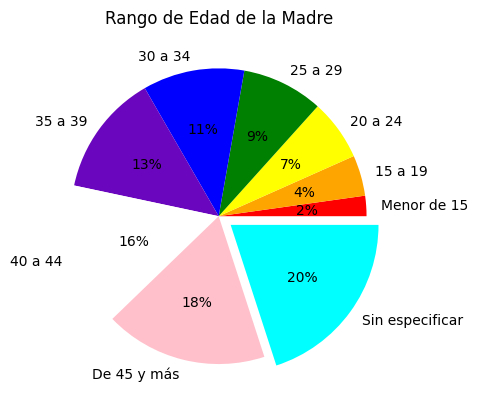

In [31]:
# Creacion Grafico Rango de Edad con Dataframe "new_df"
# Acomode Grupos por edad en var_x con su Etiqueta
var_x = new_df["id_edad"].unique()
etiquetas = new_df["Rango_edad_madre"].unique()
colores = ["red","orange","yellow","green","blue","#6a06bd","white","pink","cyan"]
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0.1]

fig, ax = plt.subplots()
ax.pie(var_x, labels = etiquetas, autopct='%.0f%%', explode = explode, colors=colores)
ax.set_title('Rango de Edad de la Madre')
plt.savefig("Graficos_generados/rango_edad.png", dpi=600)
plt.show()

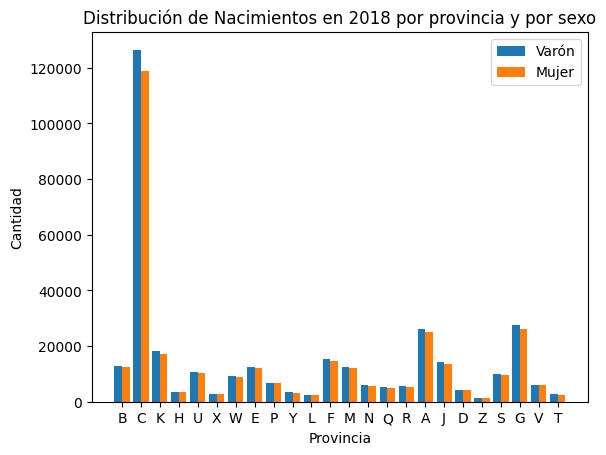

In [32]:
# GRAFICAR DISTRIBUCION DE NACIMIENTOS EN 2018 POR PROVINCIA DISCRIMINADO POR SEXO.
co = np.arange(len(df_Letra))
an = 0.40
# Definir lugar donde se realiza la gráfica y asignar parámetros
fig, ax = plt.subplots()
ax.bar(co - an/2, varon_count, an, label= 'Varón')
ax.bar(co + an/2, mujer_count, an, label= 'Mujer')

ax.set_title('Distribución de Nacimientos en 2018 por provincia y por sexo')
ax.set_xlabel('Provincia')
ax.set_ylabel('Cantidad')
ax.set_xticks(co)
ax.set_xticklabels(df_Letra["Letra"])

plt.legend()
plt.savefig("Graficos_generados/distribucion_nacimientos.png", dpi=600)
plt.show()

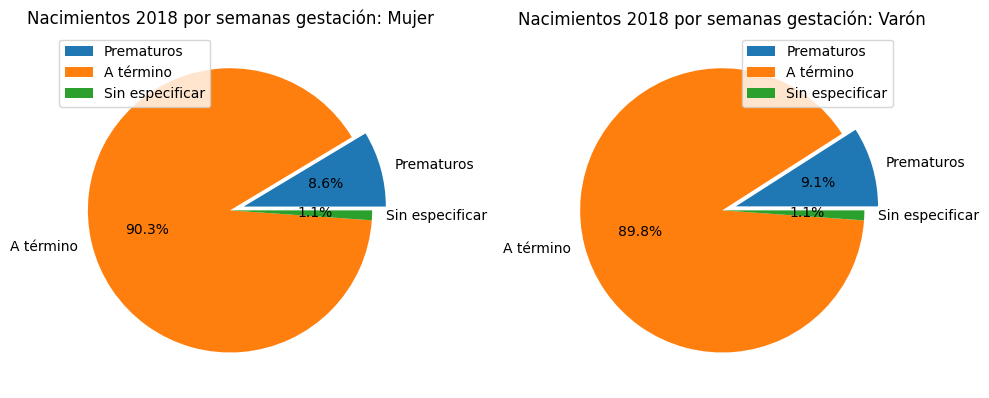

In [33]:
# GRAFICAR COMPARATIVOS DE NACIMIENTOS EN 2018 DE PREMATUROS Y A TERMINO POR SEXO.
# Crear la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
explode = (0.1, 0, 0)  # Expande la primera rebanada
# Grafico de torta para Mujer
ax1.pie(Total_M, explode=explode, labels=Descripcion, autopct='%1.1f%%')
ax1.set_title('Nacimientos 2018 por semanas gestación: Mujer')

# Grafico de torta para Varón
ax2.pie(Total_V, explode=explode, labels=Descripcion, autopct='%1.1f%%')
ax2.set_title('Nacimientos 2018 por semanas gestación: Varón')
# Crear las leyendas para cada gráfico de torta
legend1 = ax1.legend(loc='upper left')
legend2 = ax2.legend(loc='upper right')

# Ajustar la disposición de los subgráficos y mostrar la figura
plt.tight_layout()
plt.savefig("Graficos_generados/gestacion.png", dpi=600)
plt.show()

### Consulta: Nacimientos discriminados por edad de la madre

In [34]:
# Agrupamos y sumamos los nacimientos
rangoedadmama = df.groupby('edad_de_la_madre_grupos_id')['cantidad_nacimientos'].sum()
print(rangoedadmama)

edad_de_la_madre_grupos_id
1      2350
2     84768
3    164480
4    163156
5    140679
6     91509
7     24866
8      1927
9     11659
Name: cantidad_nacimientos, dtype: int64


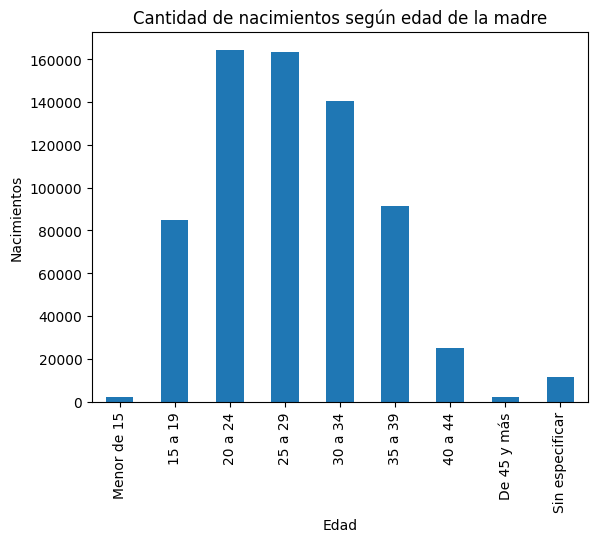

In [35]:
#Gráfico de cantidad de nacimientos por grupos etarios de la madre.-
#rangoedadmama.plot.barh()
rangoedadmama.plot.bar()

#Cambiamos los números en las barras por las etiquetas de grupos etarios:
plt.xticks(range(len(grupos_etarios)), grupos_etarios, rotation='vertical')

#Datos infaltables para todo gráfico: Título y etiquetas de ejes
plt.title("Cantidad de nacimientos según edad de la madre")
plt.xlabel("Edad")
plt.ylabel("Nacimientos")
plt.savefig("Graficos_generados/cantidad_nacimientos.png", dpi=600)
plt.show()

### Consulta: Cantidad de Nacimientos por nivel de instrucción

In [36]:
# Agrupar según nivel de instrucción y sumar los nacimientos correspondientes a cada nivel:
nacimientos_x_instruccion = df.groupby('instruccion_de_la_madre_id')['cantidad_nacimientos'].sum()

print(nacimientos_x_instruccion)

instruccion_de_la_madre_id
1      1726
2     22305
3    102035
4    161474
5    205616
6     44745
7     95637
8     51856
Name: cantidad_nacimientos, dtype: int64


In [37]:
#Calculo los porcentajes de nacimientos según orden de instrucción:
total_nacimientos = nacimientos_x_instruccion.sum()

porcentajes_nacimientos_instruccion = []
for i in range(len(nacimientos_x_instruccion)):
    porcentaje = nacimientos_x_instruccion[i+1]*100/total_nacimientos
    porcentaje = round(porcentaje, 2)
    porcentajes_nacimientos_instruccion.append(porcentaje)

print(porcentajes_nacimientos_instruccion)

[0.25, 3.25, 14.89, 23.56, 30.0, 6.53, 13.95, 7.57]


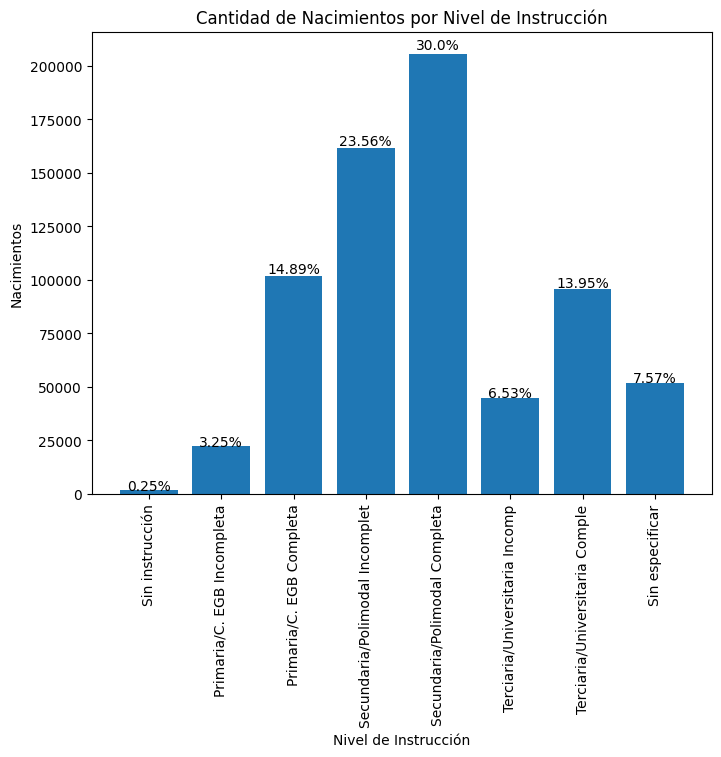

In [38]:
#Gráfico cantidad de nacimientos según nivel de instrucción:
plt.figure(figsize=(8, 6))
grafico = plt.bar(range(len(niveles_instruccion)), list(nacimientos_x_instruccion))
plt.xticks(range(len(niveles_instruccion)), niveles_instruccion, rotation='vertical')
plt.title('Cantidad de Nacimientos por Nivel de Instrucción')
plt.xlabel('Nivel de Instrucción')
plt.ylabel('Nacimientos')

#Coloco los porcentajes sobre las barras:
i = 0
for barra in grafico:
    ancho = barra.get_width()
    alto = barra.get_height()
    x, y = barra.get_xy()
    
    plt.text(x+ancho/2, y+alto*1.01, str(porcentajes_nacimientos_instruccion[i])+"%", ha='center')
    i += 1

plt.savefig("Graficos_generados/nacimientos_segun_nivel_instruccion.png", dpi=600)
plt.show()

### Consulta: Comparativa de nacimientos según edad de la madre para máximos y mínimos niveles educativos

In [39]:
#Agrupar según nivel de instrucción y edad y sumar los nacimientos correspondientes a cada combinación
nacimientos_instruccion_edad = df.groupby(['instruccion_de_la_madre_id', 'edad_de_la_madre_grupos_id'])['cantidad_nacimientos'].sum()

print(nacimientos_instruccion_edad)

instruccion_de_la_madre_id  edad_de_la_madre_grupos_id
1                           1                               17
                            2                              232
                            3                              391
                            4                              375
                            5                              350
                                                          ... 
8                           5                             8896
                            6                             5658
                            7                             1558
                            8                              114
                            9                             5398
Name: cantidad_nacimientos, Length: 69, dtype: int64


Creamos una función que sume los nacimientos discriminados segun edad para un nivel o rango de instrucción determinado y los devuelva en una lista ordenada. Debe recibir como parámetros los ***id*** correspondientes al mínimo y máximo niveles de instrucción que definen el rango deseado.

In [40]:
def suma_nacimientos_xedad_xinstruccion(min_instruccion, max_instruccion):
    suma_nxexi = []
    for i in range(len(grupos_etarios)):
        nacimientos = 0
        for nivel_instruccion in range(min_instruccion, max_instruccion):
            # Es necesaria la cláusula try-except ya que es posible que no existan datos para alguna
            # franja etaria determinada,correspondiente al nivel de instrucción solicitado
            try:
                nacimientos += nacimientos_instruccion_edad[nivel_instruccion][i+1]
            except KeyError:
                nacimientos += 0
        suma_nxexi.append(nacimientos)
    return suma_nxexi

Utilizando la función anterior, calculamos la sumatoria de nacimientos para rangos de *'baja'* y *'alta'* instrucción. Estos rangos los definimos de la siguiente manera:

- *Baja instrucción*: ~50% de la población con menor instrucción.
- *Alta instrucción*: ~50% de la población con mayor instrucción.

Puede observarse en la consulta de nacimientos discriminados por nivel de instrucción, cómo esta división se encuentra entre los niveles educativos *Sin Instrucción a Secundario Incompleto* como porción inferior y *Secundario Completo a Terciario Completo* como porción superior.

De todas formas, pueden consultarse los rangos deseados, manipulando los ***id*** según han sido determinados en el dataset: Sin Instrucción (1), Primaria Incompleta (2), Primaria Completa (3), Secundaria Incompleta (4), Secundaria Completa (5), Terciario Incompleto (6), Terciario Completo (7) y Sin especificar (8).

Para visualizar el *'Caso Extremo'*, ingrese los valores sugeridos y genere el posterior gráfico.

In [41]:
#Calculo la sumatoria de nacimientos y promedios de edad para rangos de baja y alta instrucción:

#Baja instrucción: Sin instrucción (1) a Secundario Incompleto (4)
suma_nxe_instruccion_baja = suma_nacimientos_xedad_xinstruccion(1, 5)  #Valores sugeridos 'Caso extremo': (4, 5)
promedio_baja = calcula_promedio_edad(suma_nxe_instruccion_baja)

#Alta instrucción: Secundario Completo (5) a Terciario Completo (7)
suma_nxe_instruccion_alta = suma_nacimientos_xedad_xinstruccion(5, 8) #Valores sugeridos 'Caso extremo': (7, 8)
promedio_alta = calcula_promedio_edad(suma_nxe_instruccion_alta)

print(suma_nxe_instruccion_baja, promedio_baja)
print(suma_nxe_instruccion_alta, promedio_alta)

[2147, 62616, 81347, 62569, 41422, 26118, 7979, 526, 2816] [25.86, 3.67]
[0, 15732, 70978, 89133, 90361, 59733, 15329, 1287, 3445] [29.81, 4.46]


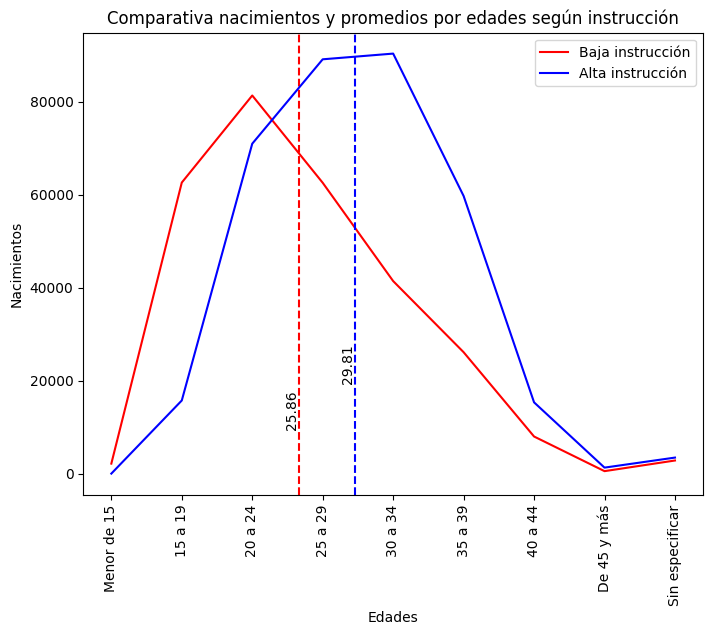

In [42]:
#Gráfico de cantidad de nacimientos según edades para baja y alta instrucción:
plt.figure(figsize=(8, 6))

#Línea Baja instrucción y promedio
plt.plot(range(len(grupos_etarios)), suma_nxe_instruccion_baja, color='r', label='Baja instrucción')
plt.axvline(promedio_baja[1]-1, color='r', linestyle='dashed')
plt.text(promedio_baja[1]-1.2, 10000, promedio_baja[0], rotation='vertical')

#Línea Alta instrucción y promedio
plt.axvline(promedio_alta[1]-1, color='b', linestyle='dashed')
plt.text(promedio_alta[1]-1.2, 20000, promedio_alta[0], rotation='vertical')
plt.plot(suma_nxe_instruccion_alta, color='b', label='Alta instrucción')

plt.xticks(range(len(grupos_etarios)), grupos_etarios, rotation='vertical')
plt.title('Comparativa nacimientos y promedios por edades según instrucción')
plt.xlabel('Edades')
plt.ylabel('Nacimientos')
plt.legend()
plt.savefig("Graficos_generados/comparativa.png", dpi=600)
plt.show()

RESULTADOS:

Puede observarse al discriminar los nacimientos según nivel educativo de la madre, que más del 50% de los mismos se hayan concentrados entre las categorías *'Secundario Incompleto'* y *'Secundario Completo'*. Se observa también una pronunciada caída de los nacimientos para las categorías de educacion superior *'Terciaria'*. Las causas de esto podrían ser múltiples, entre las que encontraríamos la edad de la madre y las dificultades de encarar este tipo de estudios en conjunción a las exigencias familiares.

Otra división notoria es la que se da entre lo que podemos denominar *'Alto'* y *'Bajo'* nivel educativo. Los niveles educativos inferiores (*'Sin Instrucción', 'Primaria Incompleta', 'Primaria Completa' y 'Secundaria Incompleta'*) comprenden aproximadamente el 50% de los datos mientras que la otra porción queda para los niveles educativos superiores (*'Secundaria Completa', 'Terciario Incompleto' y 'Terciario Completo'*)

Al hacer la comparación de la distribución de las edades para los nacimientos entre alto y bajo nivel educativo, se observan picos más tempranos de maternidad a menor educación, con un promedio de edad de **25.9** años, en contraste a los picos más tardíos de maternidad para los niveles de instrucción altos, con un promedio de edad de la madre que ronda los **29.9** años.

El caso más extremo se da entre los niveles educativos *'Secundario Incompleto'* y *'Terciario Completo'* con unos promedios de edad de **24.8** y **33.3** años respectivamente.

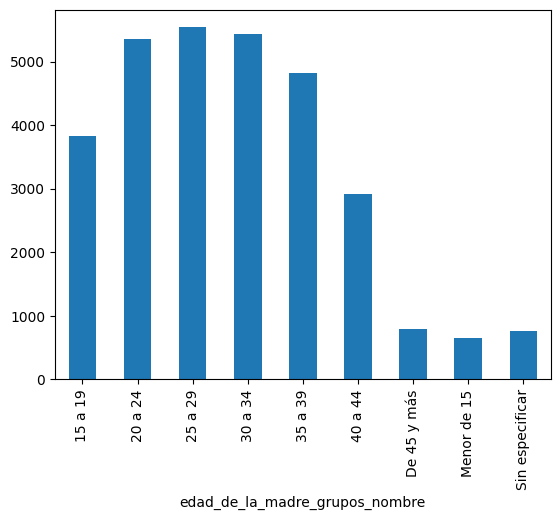

In [43]:
#Mostramos graficamente la tabla de los datos agrupados por el rango etario de la madre relacionado con la cantidad de nacimientos de acuerdo a las semanas de gestación
tablaAgrupada1["semanas_de_gestacion_nombre"].plot(kind="bar") #genera el gráfico de barras
plt.savefig("Graficos_generados/rango_etario.png", dpi=600)
plt.show() #muestra el gráfico

# **CONCLUSIONES:**


En el gráfico de barras se observa que los nacimientos de varones es un poco mas elevado en cada provincia que el nacimiento de mujeres.

En los gráficos comparativos de acuerdo a los datos de nacimientos durante el año 2018 se observa en los gráficos de torta que los nacimientos prematuros de varones es 0,5% superior al de nacimientos prematuros de mujeres.

